In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plFuns import *
plt.rcParams['figure.figsize']=[32,18]

In [2]:
countries=['EN','ES','NL']
seasons=pd.Series({_cntr:Season(_cntr) for _cntr in countries})

In [3]:
seasons['EN'].all.tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
250,03/02/18,Arsenal,Everton,5.0,1.0
251,03/02/18,Bournemouth,Stoke,2.0,1.0
252,03/02/18,Brighton,West Ham,3.0,1.0
253,03/02/18,Burnley,Man City,1.0,1.0
254,03/02/18,Leicester,Swansea,1.0,1.0
255,03/02/18,Man United,Huddersfield,2.0,0.0
256,03/02/18,West Brom,Southampton,2.0,3.0
257,04/02/18,Crystal Palace,Newcastle,1.0,1.0
258,04/02/18,Liverpool,Tottenham,2.0,2.0
259,05/02/18,Watford,Chelsea,NaN,NaN


In [4]:
for _season in seasons:
    print(_season.url)
    _season.calibrate()

http://www.football-data.co.uk/mmz4281/1718/E0.csv
http://www.football-data.co.uk/mmz4281/1718/SP1.csv
http://www.football-data.co.uk/mmz4281/1718/N1.csv


In [5]:
utd=seasons['EN'].Teams['Man United']
city=seasons['EN'].Teams['Man City']
tot=seasons['EN'].Teams['Tottenham']
chel=seasons['EN'].Teams['Chelsea']
#barca=seasons['ES'].Teams['Barcelona']
#rm=seasons['ES'].Teams['Real Madrid']
pool=seasons['EN'].Teams['Liverpool']

In [6]:
for _season in seasons:
    _season.SimulateRestOfSeason(nScenarios=int(1e5))

In [7]:
seasons['EN'].get_all_results().head(6)

,Average Goals Against,Average Goals Scored,Average Points,CL,GA,GF,Points,Relegated,Win,lambda,tau
Man City,30.18,109.33,98.11,100.000,19,74,69,0.0,99.934,2.246,0.225
Man United,29.98,73.63,79.58,93.467,18,51,56,0.0,0.059,1.236,0.183
Liverpool,41.93,88.12,78.14,90.710,31,59,51,0.0,0.005,1.657,0.327
Chelsea,32.06,67.02,74.03,54.751,19,45,50,0.0,0.001,1.089,0.224
Tottenham,35.60,75.60,73.76,57.199,24,51,49,0.0,0.001,1.337,0.233
Arsenal,51.91,74.81,65.98,3.869,35,51,45,0.0,0.000,1.311,0.651


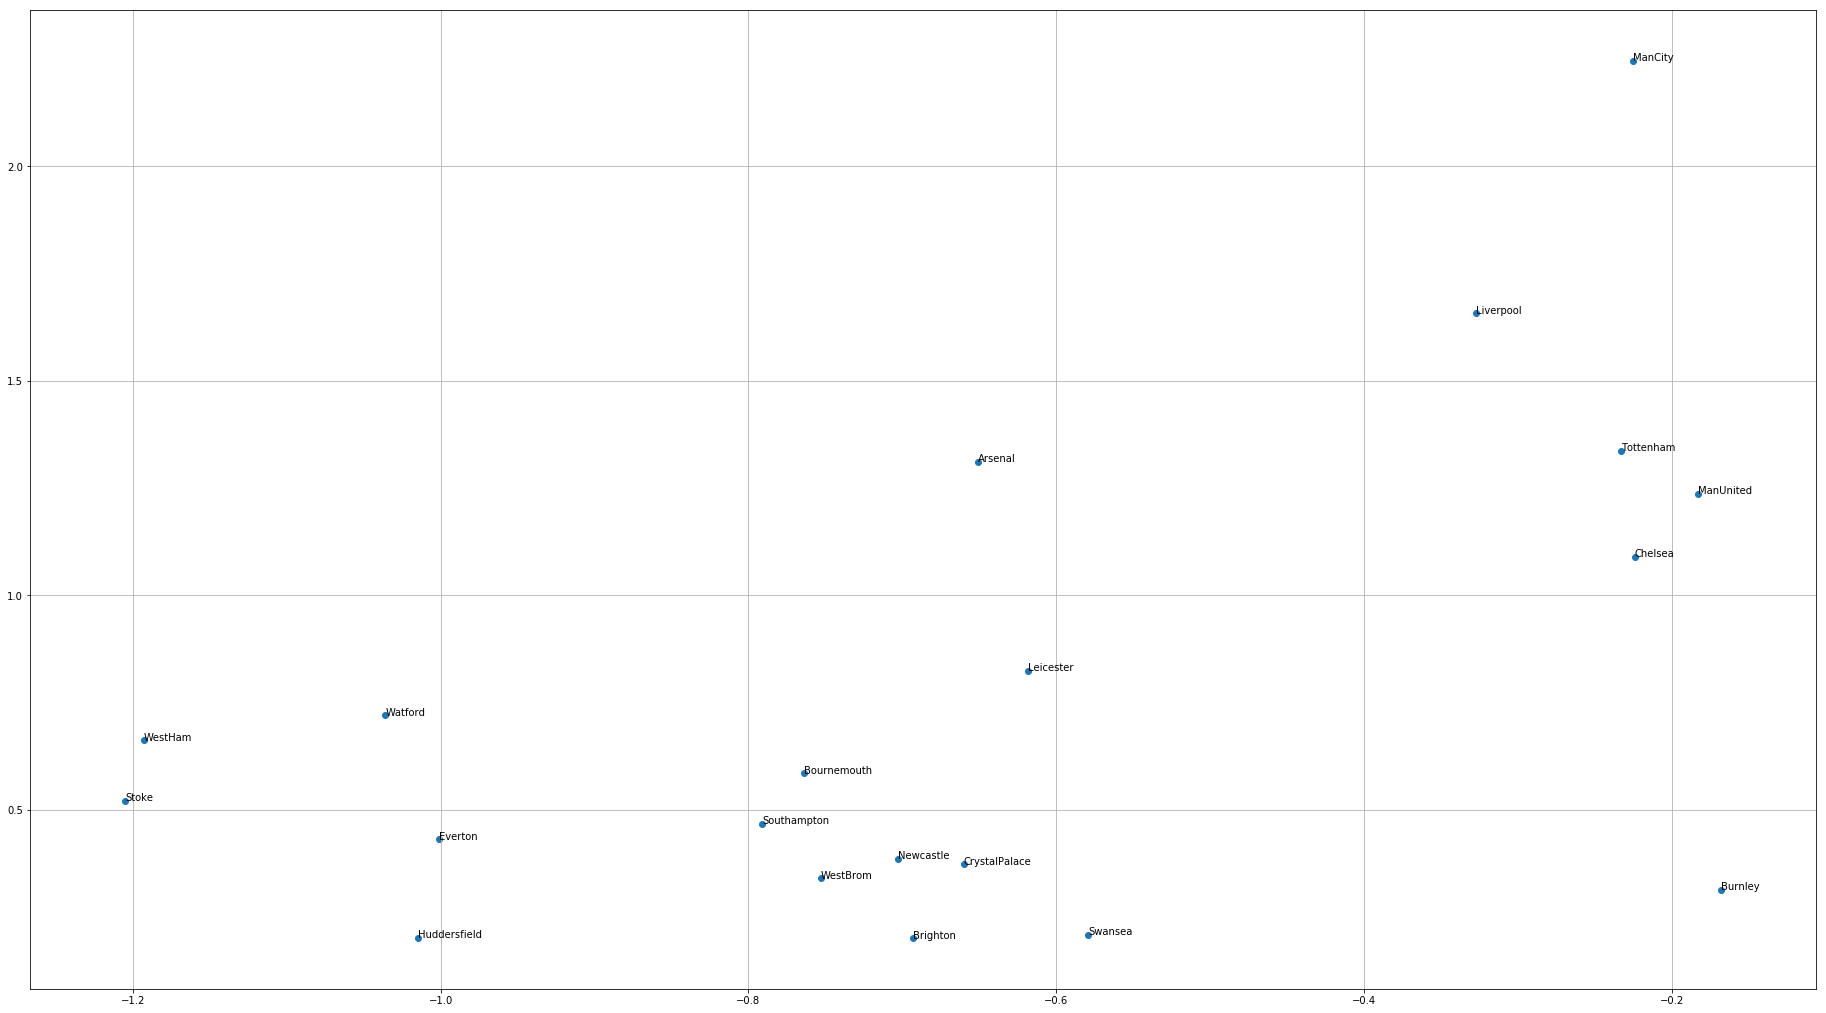

In [8]:
for ssn in ['EN']:
    results=seasons[ssn].get_all_results()
    x=-results['tau']
    y=results['lambda']
    nms=list(results.index)
    plt.scatter(x,y)
    for i, txt in enumerate(nms):
        plt.annotate(txt.replace(' ',''), (x[i],y[i]))    
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(32,18)
plt.savefig('ratings.pdf')

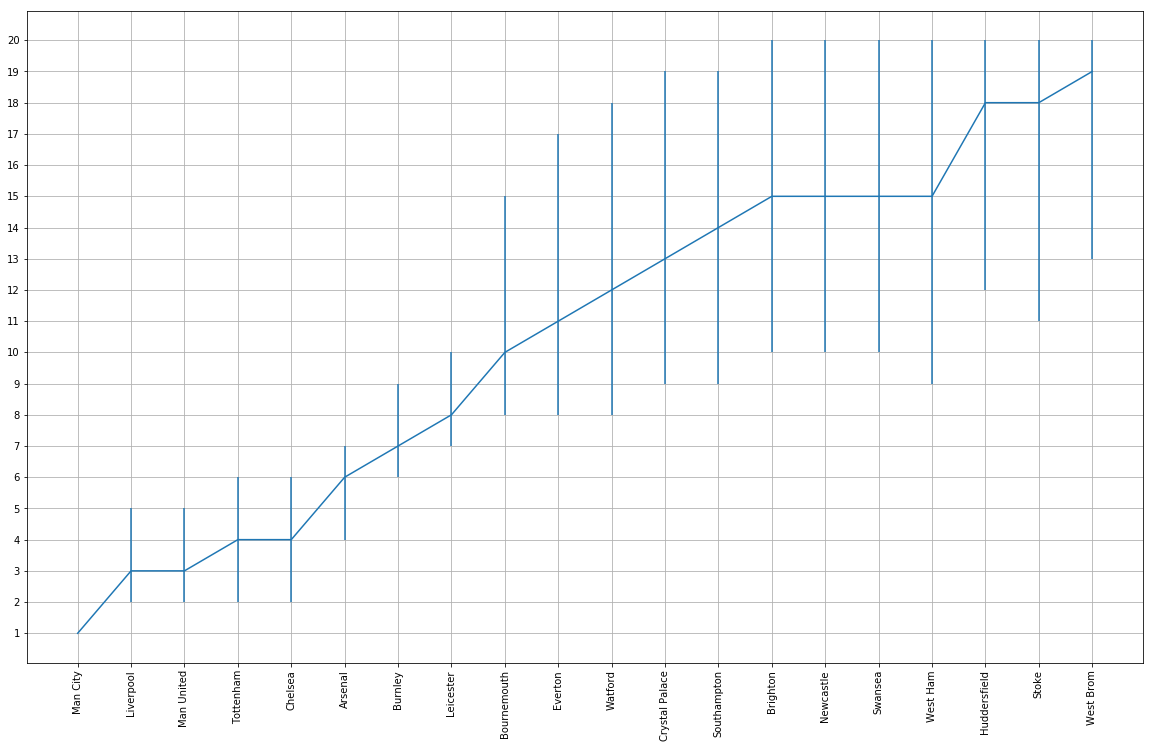

In [9]:
seasons['EN'].conf_int_plot(95,kind='')

In [10]:
pool + tot

array([0.4318, 0.2196, 0.3486])

In [11]:
utd+tot 

array([0.3641, 0.2404, 0.3955])

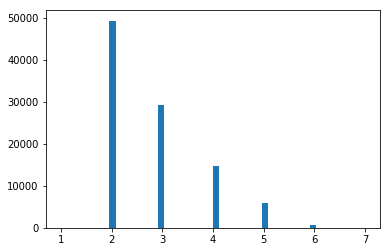

In [12]:
plt.hist(utd.place_scenarios,50);

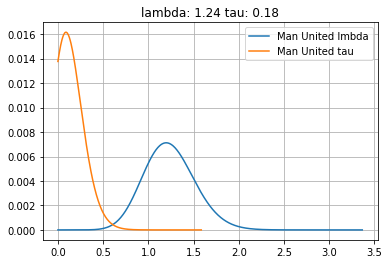

In [13]:
utd.plt()

In [14]:
(utd.place_scenarios>=5).sum()

6533

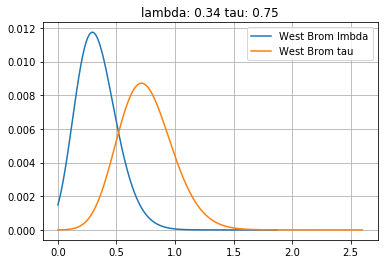

In [15]:
seasons['EN'].Teams['West Brom'].plt()